In [255]:
import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
# model selection has train, test split
from sklearn.model_selection import train_test_split
# preprocessing has scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# feature selection has RFE
from sklearn.feature_selection import RFE
# linear_model is used for fitting a model
from sklearn.linear_model import LogisticRegression
# metrics for evaluation
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
import warnings 
warnings.filterwarnings('ignore')

In [6]:
os.listdir()

['.ipynb_checkpoints',
 'churn_data.csv',
 'Logistic+Regression+-+Telecom+Churn+Case+Study.ipynb',
 'customer_data.csv',
 'EDA.ipynb',
 'internet_data.csv',
 'Telecom Churn Data Dictionary.csv']

In [8]:
churn_df = pd.read_csv('churn_data.csv')
churn_df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
cust_df = pd.read_csv('customer_data.csv')
cust_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [10]:
internet_df = pd.read_csv('internet_data.csv')
internet_df.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [13]:
df_1 = pd.merge(churn_df, cust_df, how='inner', on='customerID')
df_1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [91]:
df_merge = pd.merge(df_1, internet_df, how='inner', on='customerID')
df_merge.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [92]:
df_merge.shape

(7043, 21)

In [93]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [94]:
df_merge.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


# convert categorical variables to numeric form

In [95]:
df_master = df_merge.copy()

In [96]:
var_list = ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

df_master[var_list] = df_master[var_list].apply(lambda x: x.map({'Yes':1, 'No':0}))

df_master.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [97]:
df_dummy = pd.get_dummies(df_master[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)
df_master = df_master.drop(['Contract', 'PaymentMethod', 'gender', 'InternetService'], axis=1)
df_master = pd.concat([df_master, df_dummy], axis=1)

In [98]:
df_dummy = pd.get_dummies(df_master['MultipleLines'], prefix='MultipleLines')
df_dummy = df_dummy.drop('MultipleLines_No phone service', axis=1)
df_master = pd.concat([df_master, df_dummy], axis=1)
df_master = df_master.drop('MultipleLines', axis=1)

In [99]:
df_dummy = pd.get_dummies(df_master['OnlineSecurity'], prefix='OnlineSecurity')
df_dummy = df_dummy.drop('OnlineSecurity_No internet service', axis=1)
df_master = pd.concat([df_master, df_dummy], axis=1)
df_master = df_master.drop('OnlineSecurity', axis=1)

df_dummy = pd.get_dummies(df_master['OnlineBackup'], prefix='OnlineBackup')
df_dummy = df_dummy.drop('OnlineBackup_No internet service', axis=1)
df_master = pd.concat([df_master, df_dummy], axis=1)
df_master = df_master.drop('OnlineBackup', axis=1)

df_dummy = pd.get_dummies(df_master['DeviceProtection'], prefix='DeviceProtection')
df_dummy = df_dummy.drop('DeviceProtection_No internet service', axis=1)
df_master = pd.concat([df_master, df_dummy], axis=1)
df_master = df_master.drop('DeviceProtection', axis=1)

df_dummy = pd.get_dummies(df_master['TechSupport'], prefix='TechSupport')
df_dummy = df_dummy.drop('TechSupport_No internet service', axis=1)
df_master = pd.concat([df_master, df_dummy], axis=1)
df_master = df_master.drop('TechSupport', axis=1)

df_dummy = pd.get_dummies(df_master['StreamingTV'], prefix='StreamingTV')
df_dummy = df_dummy.drop('StreamingTV_No internet service', axis=1)
df_master = pd.concat([df_master, df_dummy], axis=1)
df_master = df_master.drop('StreamingTV', axis=1)

df_dummy = pd.get_dummies(df_master['StreamingMovies'], prefix='StreamingMovies')
df_dummy = df_dummy.drop('StreamingMovies_No internet service', axis=1)
df_master = pd.concat([df_master, df_dummy], axis=1)
df_master = df_master.drop('StreamingMovies', axis=1)

In [100]:
df_master.TotalCharges = pd.to_numeric(df_master.TotalCharges, errors='coerce')

In [101]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

## We did not do drop_first and removed no internet and phone service since it is redundant to no phone service and internet service columns with Nos

In [105]:
df_merge.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [103]:
df_merge.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [104]:
df_merge.DeviceProtection.value_counts() 

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

## Check for Outliers

In [110]:
num_cols = ['MonthlyCharges', 'TotalCharges', 'PhoneService', 'PaperlessBilling', 'tenure']
df_master[num_cols].describe()

,MonthlyCharges,TotalCharges,PhoneService,PaperlessBilling,tenure
count,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,2283.300441,0.903166,0.592219,32.371149
std,30.090047,2266.771362,0.295752,0.491457,24.559481
min,18.250000,18.800000,0.000000,0.000000,0.000000
25%,35.500000,401.450000,1.000000,0.000000,9.000000
50%,70.350000,1397.475000,1.000000,1.000000,29.000000
75%,89.850000,3794.737500,1.000000,1.000000,55.000000
max,118.750000,8684.800000,1.000000,1.000000,72.000000


## Check for NULLS

In [129]:
df_master.isnull().sum()

tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBackup_Yes                         0
DeviceProte

In [113]:
df_master.TotalCharges.isnull().sum()/df_master.shape[0] *100

0.1561834445548772

## Remove the NULL rows

In [114]:
df_master = df_master[~df_master.TotalCharges.isnull()]

In [115]:
df_master.shape

(7032, 32)

## Remove non-predictor columnn

In [119]:
df_master = df_master.drop('customerID', axis=1)

## Do train test Split

In [395]:
df_train, df_test = train_test_split(df_master, train_size=0.7)

In [396]:
print(df_train.shape, df_test.shape)

(4922, 31) (2110, 31)


In [397]:
y_train, X_train = df_train.pop('Churn'), df_train

In [398]:
y_test, X_test = df_test.pop('Churn'), df_test

In [399]:
print(X_train.shape, X_test.shape)

(4922, 30) (2110, 30)


## Do standard scaling

In [400]:
X_train.columns

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

In [401]:
scaler = StandardScaler()
var_list = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_train[var_list] = scaler.fit_transform(df_train[var_list])

In [402]:
df_train[var_list].describe()

,tenure,MonthlyCharges,TotalCharges
count,4.922000e+03,4.922000e+03,4.922000e+03
mean,3.712773e-17,2.669317e-16,-6.541338e-17
std,1.000102e+00,1.000102e+00,1.000102e+00
min,-1.271914e+00,-1.559842e+00,-9.983881e-01
25%,-9.773253e-01,-8.865260e-01,-8.334810e-01
50%,-1.341912e-01,1.783406e-01,-3.862513e-01
75%,9.222660e-01,8.295330e-01,6.614675e-01
max,1.613027e+00,1.791294e+00,2.810600e+00


## Check Churn rate in dataset - class imbalance

## We have about 73% no Churn class

In [403]:
df_master.Churn.sum()/df_master.shape[0] * 100

26.578498293515356

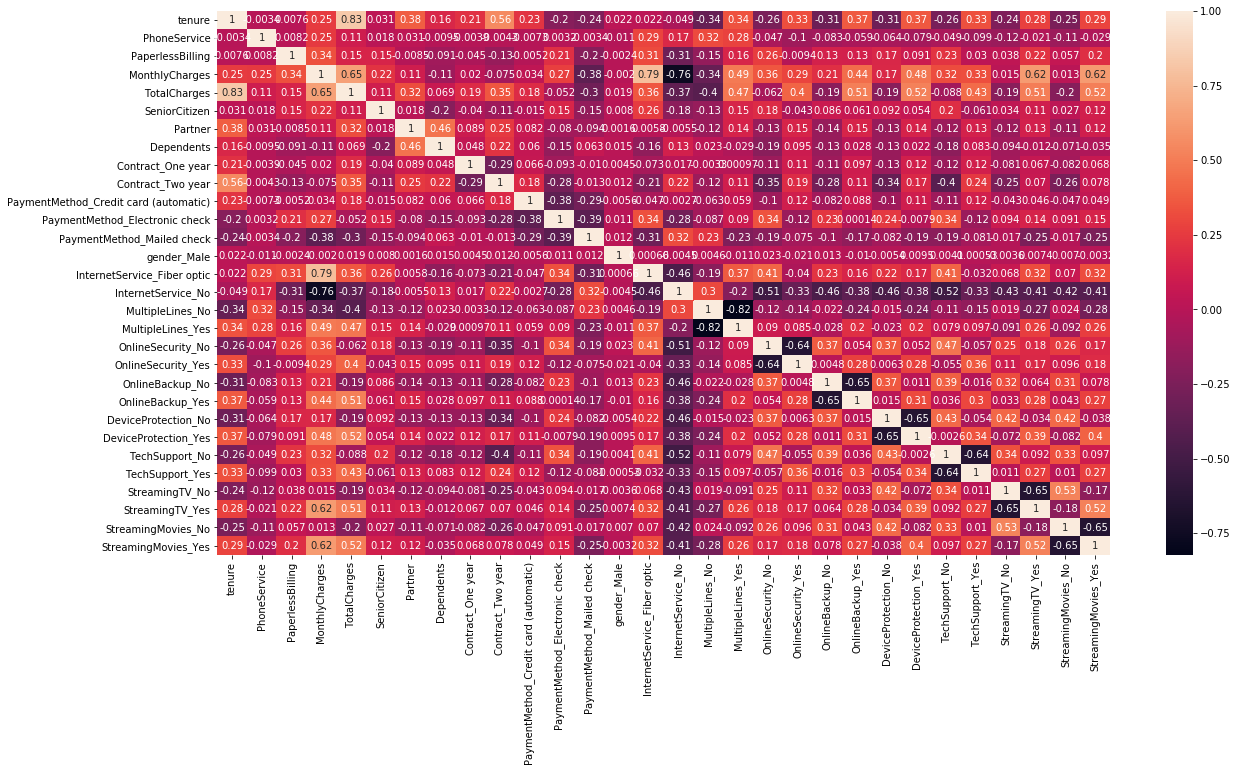

In [404]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

## Lets remove highly correlated 'NO' cols since they are correlated to 'Yes' col

In [405]:
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
5100,-1.271914,1,0,0.340304,-0.973555,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
3933,-0.946851,1,0,-1.516430,-0.927228,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2771,-0.784319,1,1,-0.065439,-0.647641,0,1,1,0,0,...,1,0,0,1,1,0,1,0,0,1
1304,-0.703053,1,1,0.684267,-0.415239,1,1,0,0,0,...,1,0,1,0,1,0,1,0,0,1
6948,0.597202,1,1,1.288707,1.072601,0,0,0,1,0,...,1,0,0,1,0,1,0,1,0,1


In [406]:
X_train = X_train.drop(['MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No'], axis=1)
X_test = X_test.drop(['MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No'], axis=1)

# Lets get the overview of statistics of features after fitting model with statsmodels

In [407]:
# Generalised Linear models
# create model object
logml = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
# do a fit and summarise
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2045.2
Date:                Mon, 15 Mar 2021   Deviance:                       4090.5
Time:                        11:34:11   Pearson chi2:                 5.31e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.0650      1.535     -1.997      0.046      -6.073      -0.057
tenure                                   -1.5482      0.185     -8.391      0.000      -1.910      -1.187
PhoneService                              0.1731      0.774      0.224      0.823      -1.344       1.690
PaperlessBilling                          0.4004      0.089      4.485      0.000       0.225       0.575
MonthlyCharges                           -1.4257      1.134     -1.258      0.208      -3.647       0.796
TotalCharges                              0.8131      0.192      4.226      0.000       0.436       1.190
SeniorCitizen                             0.2265      0.102      2.229      0.026       0.027       0.426
Partner                                   0.0051      0.093      0.054      0.957      -0.178       0.188
Dependents                               -0.2311      0.108     -2.146      0.032      -0.442      -0.020
Contract_One year                        -0.6501      0.127     -5.110      0.000      -0.899      -0.401
Contract_Two year                        -1.5219      0.220     -6.921      0.000      -1.953      -1.091
PaymentMethod_Credit card (automatic)    -0.0608      0.136     -0.446      0.655      -0.328       0.206
PaymentMethod_Electronic check            0.3590      0.113      3.174      0.002       0.137       0.581
PaymentMethod_Mailed check               -0.0410      0.137     -0.298      0.766      -0.310       0.228
gender_Male                               0.0363      0.077      0.468      0.640      -0.116       0.188
InternetService_Fiber optic               1.9779      0.952      2.077      0.038       0.112       3.844
InternetService_No                       -1.7272      0.962     -1.796      0.072      -3.612       0.158
MultipleLines_Yes                         0.4836      0.212      2.280      0.023       0.068       0.899
OnlineSecurity_Yes                       -0.1100      0.213     -0.516      0.606      -0.528       0.308
OnlineBackup_Yes                          0.1680      0.210      0.799      0.424      -0.244       0.580
DeviceProtection_Yes                      0.0952      0.211      0.452      0.651      -0.318       0.508
TechSupport_Yes                          -0.0267      0.217     -0.123      0.902      -0.453       0.399
StreamingTV_Yes                           0.6845      0.389      1.760      0.078      -0.078       1.447
StreamingMovies_Yes                       0.7274      0.390      1.866      0.062      -0.037       1.491
=========================================================================================================
"""

## Before manual fine tuning lets use sklearn' RFE to automate feature selection 

## We need sklearn package from feature selection and linear_model to use RFE and Logistic Regression

In [440]:
# RFE does internal fitting for logistic regression to figure the least important coefficients iteratively
log_reg = LogisticRegression()
# initialize RFE with log_regression model and number of features needed
rfe = RFE(log_reg, 13)
# fit iteratively the data set
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=13, step=1, verbose=0)

In [441]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', False, 2),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 11),
 ('Dependents', False, 4),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 8),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 9),
 ('gender_Male', False, 10),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 3),
 ('OnlineBackup_Yes', False, 7),
 ('DeviceProtection_Yes', False, 6),
 ('TechSupport_Yes', False, 5),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [442]:
X_train_rfe = X_train.loc[:, X_train.columns[rfe.support_]]

In [443]:
X_train_rfe.shape

(4922, 13)

## Lets analyse the statistics of the new feature based model

In [444]:
# create an object of statsmodel GLM
lr_sm = sm.GLM(y_train, sm.add_constant(X_train_rfe), family=sm.families.Binomial())
# Fit the parameters
model = lr_sm.fit()
# summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2050.8
Date:                Mon, 15 Mar 2021   Deviance:                       4101.6
Time:                        11:50:10   Pearson chi2:                 5.23e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.8590      0.171    -16.768      0.000      -3.193      -2.525
tenure                            -1.5702      0.182     -8.641      0.000      -1.926      -1.214
PaperlessBilling                   0.4136      0.089      4.657      0.000       0.240       0.588
MonthlyCharges                    -1.2249      0.186     -6.587      0.000      -1.589      -0.860
TotalCharges                       0.8447      0.191      4.425      0.000       0.471       1.219
SeniorCitizen                      0.2727      0.100      2.735      0.006       0.077       0.468
Contract_One year                 -0.6738      0.126     -5.344      0.000      -0.921      -0.427
Contract_Two year                 -1.5896      0.217     -7.330      0.000      -2.015      -1.165
PaymentMethod_Electronic check     0.4063      0.082      4.956      0.000       0.246       0.567
InternetService_Fiber optic        1.8439      0.202      9.146      0.000       1.449       2.239
InternetService_No                -1.5334      0.211     -7.280      0.000      -1.946      -1.121
MultipleLines_Yes                  0.4584      0.102      4.498      0.000       0.259       0.658
StreamingTV_Yes                    0.6207      0.112      5.549      0.000       0.401       0.840
StreamingMovies_Yes                0.6675      0.112      5.983      0.000       0.449       0.886
==================================================================================================
"""

In [445]:
y_pred_train = model.predict(sm.add_constant(X_train_rfe))
results = pd.DataFrame()
#results['cust_idx'] = y_train.index
results['Churn'] = y_train
results['Churn_prb'] = y_pred_train
results['Churn_pred'] = y_pred_train.apply(lambda x: 0 if x < 0.5 else 1)

In [446]:
results.head()

,Churn,Churn_prb,Churn_pred
5100,1,0.537222,1
3933,0,0.138072,0
2771,0,0.266346,0
1304,1,0.670873,1
6948,0,0.233058,0


## Confusion matrix

In [447]:
metrics.confusion_matrix(results.Churn_pred, results.Churn)

array([[3244,  592],
       [ 370,  716]])

In [448]:
metrics.accuracy_score(results.Churn_pred, results.Churn)

0.8045509955302722

# To improve this further we need to check VIF

In [449]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif.sort_values(ascending=False, by='VIF')

,Features,VIF
2,MonthlyCharges,13.634046
3,TotalCharges,10.119407
0,tenure,6.907180
8,InternetService_Fiber optic,5.877150
9,InternetService_No,5.148541
11,StreamingTV_Yes,2.811003
12,StreamingMovies_Yes,2.800709
1,PaperlessBilling,2.762961
6,Contract_Two year,2.607045
10,MultipleLines_Yes,2.396596


In [450]:
X_train_rfe_new = X_train_rfe.drop('PhoneService', axis=1)

KeyError: "['PhoneService'] not found in axis"

# Rebuild model using statsmodel

In [451]:
lr_ml = sm.GLM(y_train, sm.add_constant(X_train_rfe_new), family=sm.families.Binomial())
model = lr_ml.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2059.8
Date:                Mon, 15 Mar 2021   Deviance:                       4119.6
Time:                        11:50:12   Pearson chi2:                 4.83e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.6011      0.187    -13.883      0.000      -2.968      -2.234
tenure                            -0.8225      0.064    -12.918      0.000      -0.947      -0.698
PaperlessBilling                   0.4006      0.089      4.521      0.000       0.227       0.574
MonthlyCharges                    -0.8161      0.182     -4.482      0.000      -1.173      -0.459
SeniorCitizen                      0.2731      0.100      2.724      0.006       0.077       0.470
Contract_One year                 -0.6737      0.125     -5.398      0.000      -0.918      -0.429
Contract_Two year                 -1.5448      0.214     -7.206      0.000      -1.965      -1.125
PaymentMethod_Electronic check     0.3920      0.082      4.767      0.000       0.231       0.553
InternetService_Fiber optic        1.6353      0.212      7.721      0.000       1.220       2.050
InternetService_No                -1.2731      0.202     -6.298      0.000      -1.669      -0.877
MultipleLines_Yes                  0.4358      0.103      4.236      0.000       0.234       0.637
OnlineSecurity_Yes                -0.1738      0.106     -1.638      0.101      -0.382       0.034
StreamingTV_Yes                    0.5699      0.114      5.016      0.000       0.347       0.793
StreamingMovies_Yes                0.6245      0.113      5.528      0.000       0.403       0.846
==================================================================================================
"""

# Check VIF

In [452]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif.sort_values(ascending=False, by='VIF')

,Features,VIF
2,MonthlyCharges,10.269681
7,InternetService_Fiber optic,5.791133
8,InternetService_No,5.216899
5,Contract_Two year,2.868122
11,StreamingTV_Yes,2.815305
12,StreamingMovies_Yes,2.810068
1,PaperlessBilling,2.793402
9,MultipleLines_Yes,2.409383
0,tenure,2.228280
6,PaymentMethod_Electronic check,1.928773


In [453]:
X_train_rfe_new = X_train_rfe_new.drop('TotalCharges', axis=1)

KeyError: "['TotalCharges'] not found in axis"

In [454]:
lr_ml = sm.GLM(y_train, sm.add_constant(X_train_rfe_new), family=sm.families.Binomial())
model = lr_ml.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2059.8
Date:                Mon, 15 Mar 2021   Deviance:                       4119.6
Time:                        11:50:13   Pearson chi2:                 4.83e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.6011      0.187    -13.883      0.000      -2.968      -2.234
tenure                            -0.8225      0.064    -12.918      0.000      -0.947      -0.698
PaperlessBilling                   0.4006      0.089      4.521      0.000       0.227       0.574
MonthlyCharges                    -0.8161      0.182     -4.482      0.000      -1.173      -0.459
SeniorCitizen                      0.2731      0.100      2.724      0.006       0.077       0.470
Contract_One year                 -0.6737      0.125     -5.398      0.000      -0.918      -0.429
Contract_Two year                 -1.5448      0.214     -7.206      0.000      -1.965      -1.125
PaymentMethod_Electronic check     0.3920      0.082      4.767      0.000       0.231       0.553
InternetService_Fiber optic        1.6353      0.212      7.721      0.000       1.220       2.050
InternetService_No                -1.2731      0.202     -6.298      0.000      -1.669      -0.877
MultipleLines_Yes                  0.4358      0.103      4.236      0.000       0.234       0.637
OnlineSecurity_Yes                -0.1738      0.106     -1.638      0.101      -0.382       0.034
StreamingTV_Yes                    0.5699      0.114      5.016      0.000       0.347       0.793
StreamingMovies_Yes                0.6245      0.113      5.528      0.000       0.403       0.846
==================================================================================================
"""

In [455]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif.sort_values(ascending=False, by='VIF')

,Features,VIF
2,MonthlyCharges,10.269681
7,InternetService_Fiber optic,5.791133
8,InternetService_No,5.216899
5,Contract_Two year,2.868122
11,StreamingTV_Yes,2.815305
12,StreamingMovies_Yes,2.810068
1,PaperlessBilling,2.793402
9,MultipleLines_Yes,2.409383
0,tenure,2.228280
6,PaymentMethod_Electronic check,1.928773


In [456]:
y_pred_train = model.predict(sm.add_constant(X_train_rfe_new))
results = pd.DataFrame()
#results['cust_idx'] = y_train.index
results['Churn'] = y_train
results['Churn_prb'] = y_pred_train
results['Churn_pred'] = y_pred_train.apply(lambda x: 0 if x < 0.5 else 1)

In [457]:
# Actual\Pred  0   1
#           0  TN  FP
#           1  FN  TP

In [458]:
confusion_matrix = metrics.confusion_matrix(results.Churn, results.Churn_pred )

In [459]:
metrics.accuracy_score(results.Churn_pred, results.Churn)

0.8031288094270622

In [460]:
TN = confusion_matrix[0,0]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]
TP = confusion_matrix[1,1]

In [461]:
TP

704

## ALL Metrics

## Sensitivity - ratio of correct positives predicted to total positives

In [462]:
sensitivity = TP / (TP+FN)
sensitivity

0.5382262996941896

## Specificity - ratio of correct negatives predicted to total negatives

In [463]:
specificity = TN / (TN+FP)
specificity

0.8990038738240177

## Precision - ratio of correct positives predicted to total positives predicted

In [464]:
precision = TP / (TP+FP)
precision

0.6585594013096352

## False Positive Rate - ratio of wrong positives to total negatives

In [465]:
FPR = FP/(FP+TN)
FPR

0.10099612617598229

## Negative Predictive Rate - ratio of correct negatives predicted to total negatives predicted

In [466]:
NPV = TN / (TN+FN)
NPV

0.843239034518557

## ROC for model

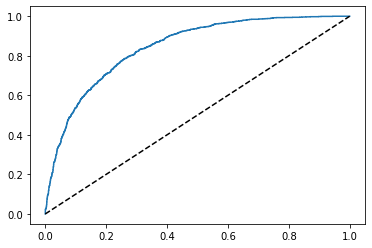

In [467]:
fpr, tpr, thresholds =metrics.roc_curve(results['Churn'], results['Churn_prb'], drop_intermediate=False)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], 'k--')
auc_score = metrics.roc_auc_score(results['Churn'], results['Churn_prb'])
plt.show()

In [468]:
auc_score

0.8432727001179579

## Optimized Cut-off

In [469]:
cut_off = pd.DataFrame(columns=['cutoff', 'sensitivity', 'specificity', 'accuracy'])

In [470]:
thres = np.arange(0, 1, 0.1)

In [471]:
val_df = results.copy() 

In [472]:

for i in thres:
    val_df['{}'.format(round(i, 2))] = results['Churn_prb'].apply(lambda x: 1 if x>i else 0)

In [473]:
val_df.head()

,Churn,Churn_prb,Churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
5100,1,0.548487,1,1,1,1,1,1,1,0,0,0,0
3933,0,0.134937,0,1,1,0,0,0,0,0,0,0,0
2771,0,0.258950,0,1,1,1,0,0,0,0,0,0,0
1304,1,0.687396,1,1,1,1,1,1,1,1,0,0,0
6948,0,0.202747,0,1,1,1,0,0,0,0,0,0,0


In [474]:
for i in range(len(thres)):
    cutoff = thres[i]
    confusion_matrix = metrics.confusion_matrix(val_df.Churn, val_df['{}'.format(round(thres[i], 2))])
    TN = confusion_matrix[0,0]
    FP = confusion_matrix[0,1]
    FN = confusion_matrix[1,0]
    TP = confusion_matrix[1,1]
    cut_off.loc[i] = [thres[i], TP/(TP+FN), TN/(TN+FP), (TP+TN)/(TP+TN+FP+FN)]

In [475]:
cut_off

,cutoff,sensitivity,specificity,accuracy
0,0.0,1.000000,0.000000,0.265746
1,0.1,0.945719,0.475927,0.600772
2,0.2,0.857034,0.648589,0.703982
3,0.3,0.750000,0.766187,0.761885
4,0.4,0.641437,0.846154,0.791751
5,0.5,0.538226,0.899004,0.803129
6,0.6,0.388379,0.945213,0.797237
7,0.7,0.197248,0.978694,0.771028
8,0.8,0.039755,0.996126,0.741975
9,0.9,0.000000,1.000000,0.734254


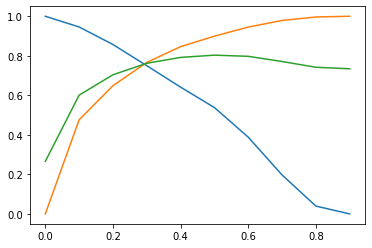

In [476]:
plt.plot(cut_off['cutoff'], cut_off['sensitivity'])
plt.plot(cut_off['cutoff'], cut_off['specificity'])
plt.plot(cut_off['cutoff'], cut_off['accuracy'])
plt.show()

In [477]:
results['Churn_pred_0.3'] = y_pred_train.apply(lambda x: 0 if x < 0.3 else 1)

In [478]:
confusion_mat = metrics.confusion_matrix(results['Churn'], results['Churn_pred_0.3'])

In [479]:
TN = confusion_mat[0,0]
FP = confusion_mat[0,1]
FN = confusion_mat[1,0]
TP = confusion_mat[1,1]

In [480]:
TP/(TP+FN)

0.75

In [481]:
FN

327

In [482]:
TN/(TN+FP)

0.7661870503597122

In [483]:
(TP+TN)/(TP+TN+FN+FP)

0.7618854124339699

## Evaluation on test set

### Perform Scaling

In [484]:
var_list = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_test[var_list] = scaler.transform(X_test[var_list])

In [485]:
X_test[var_list].head()

,tenure,MonthlyCharges,TotalCharges
5908,-1.271914,-1.499732,-0.997773
993,-0.906218,-1.302705,-0.907515
3021,-1.109382,-1.508081,-0.959599
1237,-0.784319,-1.524778,-0.887890
5772,1.491128,0.562377,1.455345


In [486]:
y_out = pd.DataFrame(columns = ['prob', 'pred'])

In [487]:
y_out['prob'] = model.predict(sm.add_constant(X_test[X_train_rfe_new.columns]))
y_out['pred'] = y_out['prob'].apply(lambda x: 1 if x>0.3 else 0)

In [488]:
conf_mat = metrics.confusion_matrix(y_test, y_out['pred'])

In [489]:
TN = conf_mat[0,0]
FP = conf_mat[0,1]
FN = conf_mat[1,0]
TP = conf_mat[1,1]

In [490]:
TP/(TP+FN)

0.7611408199643493

In [491]:
TP

427

In [492]:
TN/(TN+FP)

0.775984506132989

In [493]:
(TP+TN)/(TP+TN+FN+FP)

0.7720379146919432

## Precision Vs recall

In [494]:
thres = np.arange(0, 1, 0.1)

In [522]:
pr_df = pd.DataFrame()
pr_df['label'] = results['Churn'].copy()
pr_df['prob'] = results['Churn_prb'].copy()
precision = []
recall = []
acc = []
for i in thres:
    pr_df['{:.2f}'.format(i)] = pr_df['prob'].apply(lambda x: 1 if x>i else 0)
    confusion_matrix = metrics.confusion_matrix(pr_df['label'], pr_df['{:.2f}'.format(i)])
    TP = confusion_matrix[1,1]  
    TN = confusion_matrix[0,0]
    FP = confusion_matrix[0,1]
    FN = confusion_matrix[1,0]
    precision.append(TP/(TP+FP))
    recall.append( TP/(TP+FN) )
    acc.append( (TP+TN)/(TP+TN+FP+FN) )

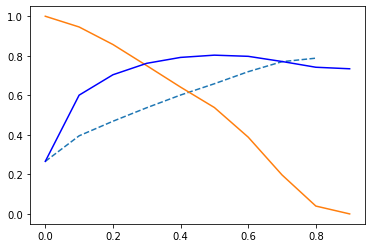

In [527]:
plt.plot(thres, precision, '--')
plt.plot(thres, recall)
plt.plot(thres, acc, 'b-')
plt.show()

In [524]:
p, r, thr  = metrics.precision_recall_curve(pr_df['label'], pr_df['prob'])

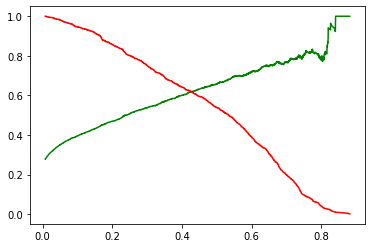

In [528]:
plt.plot(thr, p[:-1], 'g-')
plt.plot(thr, r[:-1], 'r-')
plt.show()

In [533]:
(1294+359)/(1294+359+234+223)

0.7834123222748816

In [534]:
359/(223+359)

0.6168384879725086

In [531]:
(0.75*0.6*2)/(1.35)

0.6666666666666665

In [ ]:
0    0          
1    1
1    1
1    0
0    0
0    0
0    1
1    1
1    0
1    1

In [538]:
TP = 4
TN = 3
FP = 2
FN = 1

In [539]:
acc = (TN+TP)/(TN+TP+FN+FP)
pr = TP/(TP+FP)
sen = TP/(TP+FN)
spe = TN/(TN+FP)

In [540]:
print(acc,pr,sen,spe)

0.7 0.6666666666666666 0.8 0.6
